### Figure 2
Reproducing figure 2, showing two plots with $\rm ln (\frac{S_{\rm sat} - S(t)}{N})$. The first is for small system sizes (with $N \leq 720$), the second plot is for large system sizes (with $N \geq 1560 $).

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt

#### Loading the data

The directory `/data/entropy_data` contains 24 `.npz`files, labelled by system size $N= 240, 360, ..., 3000$. Each of these files contains the results from calculating the entropy on a system with $N$ qubits, using the ThreeQuarterCircuit. In all cases the entropy has been averaged over $60$ realisations of the circuit, to smooth out fluctuations and in all cases the fraction of the total number of qubits that we use to calculate the entropy is $m=1/4$.

In [20]:
data_dir = "data/entropy_data"
dirlist = os.listdir(data_dir)
entropies = {}
for file in dirlist:
    if file.endswith(".npz") and file.startswith("N"):
        data = np.load(os.path.join(data_dir, file))
        N = int(file.split(".")[0][1:])
        for arr in data:
            entropies[N] = data[arr]

log_entropies = {
    N: np.log(1 / 4 - entropies[N][50:160] / N) for N in entropies.keys()
}
small_system_sizes = sorted(
    [N for N in entropies.keys() if N <= 800 and N >= 300]
)
large_system_sizes = sorted([1560, 2040, 2520, 3000])

#### Reproducing the plots
Plotting data for small system sizes:

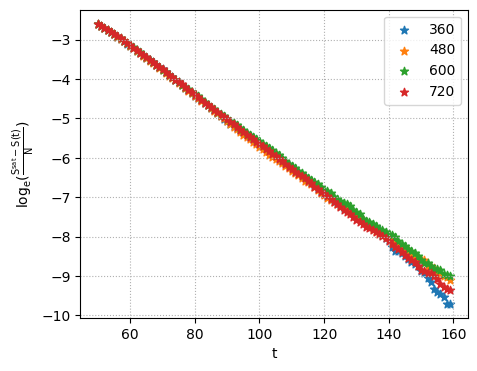

In [21]:
plt.figure(figsize=(5, 4))
for key in small_system_sizes:
    plt.scatter(range(50, 160), log_entropies[key], marker="*", label=key)
# plt.plot(range(40, 160), -l2 * times + np.log(al2) , label = 'Fit', color='black')
plt.xlabel("t")
plt.ylabel(r"$\rm log_e (\frac{S^{\rm sat} - S(t)}{N})$")
plt.legend()
plt.grid(linestyle="dotted")
plt.show()

Plotting the data for large system sizes:

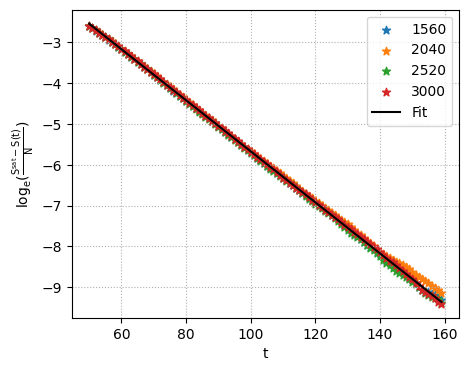

In [22]:
m, b = np.polyfit(range(50, 160), log_entropies[3000], 1)  # Fit for N = 3300.
times = np.array([t for t in range(50, 160)])
plt.figure(figsize=(5, 4))
for key in large_system_sizes:
    plt.scatter(range(50, 160), log_entropies[key], marker="*", label=key)
plt.plot(range(50, 160), m * times + b, label="Fit", color="black")
plt.xlabel("t")
plt.ylabel(r"$\rm log_e (\frac{S^{\rm sat} - S(t)}{N})$")
plt.legend()
plt.grid(linestyle="dotted")
plt.show()